## Implementing Pricipal Component Analysis (PCA) in OpenCV

In [19]:
import numpy as np

In [20]:
mean = [20, 20]
cov = [[5, 0], [25, 25]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Text(0, 0.5, 'feature 2')

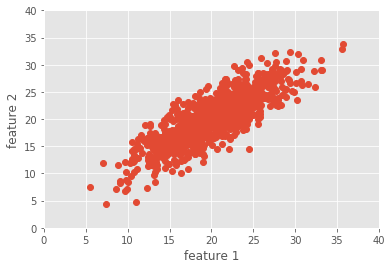

In [22]:
plt.plot(x, y, 'o', zorder=1)
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [23]:
x

array([17.17418716, 13.04720799, 27.4252825 , 23.72419555, 13.04862413,
       16.84610593, 21.09689122, 23.29172446, 14.10004556, 19.50273628,
       13.45407765, 23.83546246, 23.22716999, 20.95653266, 13.29713009,
       16.42709401, 18.63811484, 18.24094533, 20.59508548, 19.02301811,
       19.04408223, 13.45487787, 27.00454928, 19.58991813, 18.90327736,
       18.68299703, 24.24171012, 15.61267169, 23.24513177, 30.92171703,
       24.17983662, 22.74408453, 19.3732773 , 35.69183085, 20.03949574,
       16.92667228, 20.66473675, 21.61096931, 25.42452157,  9.8230148 ,
       15.9743715 , 22.69138362, 17.84140927, 27.62646762, 24.270201  ,
       23.1471078 , 22.39888298, 25.97479905, 12.12894474, 23.15520161,
       17.81945174, 15.85188325, 23.35500918, 21.83926804, 26.92258028,
       23.39648718, 17.57131081, 20.03187502, 18.04484432, 16.57779594,
       20.85621297, 18.17735519, 18.87887056, 10.79327049, 23.33754373,
       17.12770472, 16.93280513, 19.15988792, 18.25467715, 19.67

In [24]:
y

array([22.10392995, 12.03282666, 26.15644094, 18.05856302, 16.52057   ,
       13.9775998 , 23.49717331, 23.27904994, 14.22402716, 16.54255583,
       11.47734388, 21.35759263, 24.83789237, 20.76569602, 16.52047509,
       18.26429143, 23.415192  , 15.80432021, 18.9048455 , 17.53736911,
       19.47464048, 10.78704119, 24.55944567, 20.32612943, 20.89158432,
       19.726406  , 19.6747575 , 17.55776271, 22.70204231, 30.82621306,
       25.74308174, 22.04084922, 25.55174544, 33.80771172, 18.51556237,
       18.69952132, 23.86297905, 25.07770132, 26.0868787 , 10.26892936,
       23.55469031, 21.74788221, 16.90899972, 32.1768282 , 30.43497624,
       27.38292492, 21.31995891, 22.59952769, 18.90084499, 23.59977146,
       17.22726465, 15.97573921, 23.96674963, 23.07330284, 26.46780812,
       23.05134155, 20.26986809, 15.24346925, 18.0263631 , 12.51377868,
       23.07231481, 17.99868781, 20.10492912, 14.42659788, 25.69268613,
       15.29988982, 16.89164743, 19.74574541, 21.72353155, 20.49

In [25]:
X = np.vstack((x, y)).T
X

array([[17.17418716, 22.10392995],
       [13.04720799, 12.03282666],
       [27.4252825 , 26.15644094],
       ...,
       [12.37814733, 12.987238  ],
       [18.12448521, 14.08723109],
       [14.8810802 , 20.69256301]])

In [26]:
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.70929872,  0.70490803],
       [-0.70490803,  0.70929872]])

In [27]:
mu

array([[20.03963912, 20.0384537 ]])

The mean value subtracted before the projection (mean), and eigenvectors of the covariation matrix (eig). These eigenvectors point to the direction PCA considers the most informative. 

Text(0, 0.5, 'feature 2')

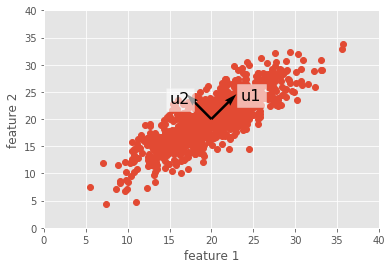

In [28]:
plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[:, 0], eig[:, 1], zorder=3, scale=0.2, units='xy')
plt.text(mean[0] + 5 * eig[0, 0], mean[1] + 5 * eig[0, 1], 'u1', 
         zorder=5, fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 7 * eig[1, 0], mean[1] + 4 * eig[1, 1], 'u2',
        zorder=5, fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [29]:
X2 = cv2.PCAProject(X, mu, eig)

[-20, 20, -10, 10]

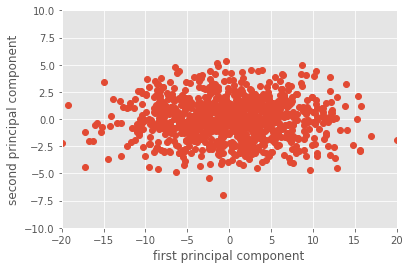

In [30]:
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20, 20, -10, 10])

## Implementing Independent Component Analysis (ICA)

In [31]:
from sklearn import decomposition
ica = decomposition.FastICA()

In [32]:
X2 = ica.fit_transform(X)

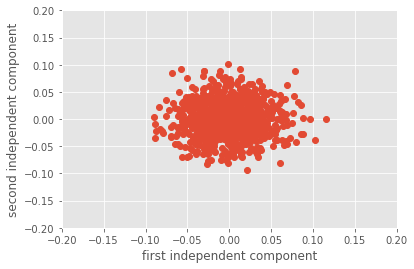

In [33]:
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first independent component')
plt.ylabel('second independent component')
plt.axis([-0.2, 0.2, -0.2, 0.2]);

## Implementing Non-negative Matrix Factorization (NMF)

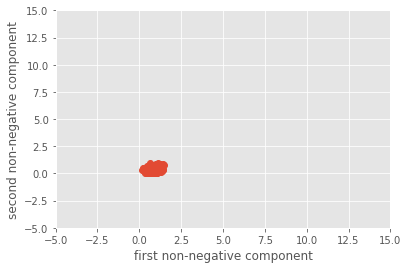

In [34]:
nmf = decomposition.NMF()
X2 = nmf.fit_transform(X)
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')
plt.axis([-5, 15, -5, 15]);